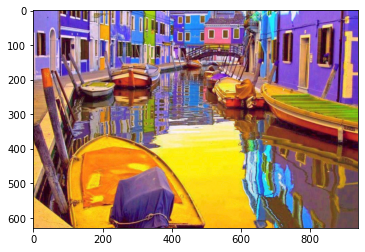

In [4]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('photo.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('photo7.jpg', quant)
plt.imshow(image)

cv2.imread('photo7.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

Mounted at /content/gdrive


In [3]:
!pip install opencv-python

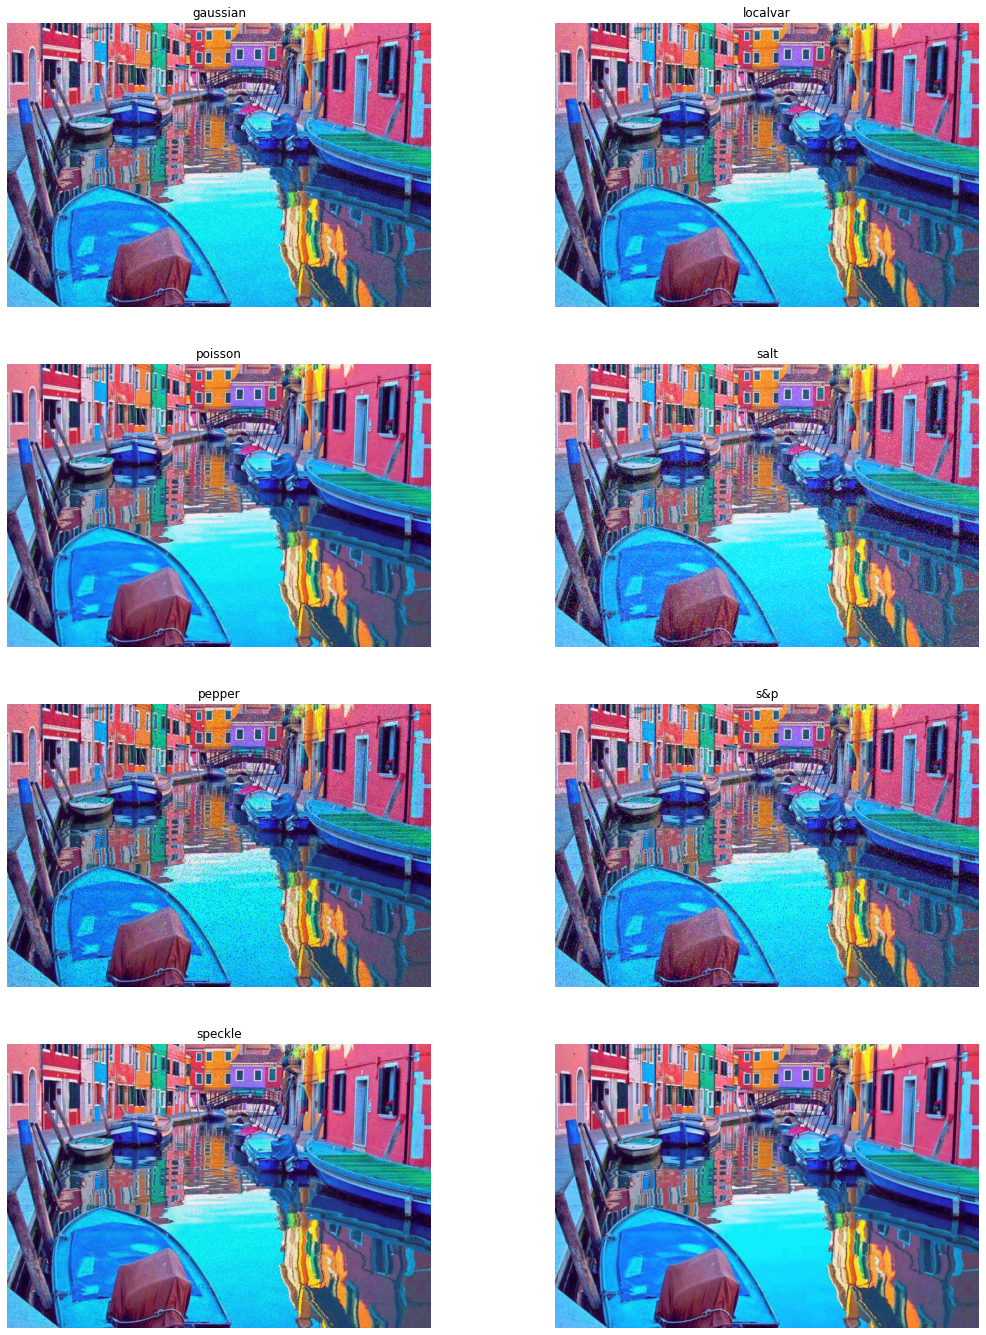

In [51]:
import skimage.io
import matplotlib.pyplot as plt
img_path="photo.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe6fbaa6208>,
 <matplotlib.image.AxesImage at 0x7fe6fba57400>)

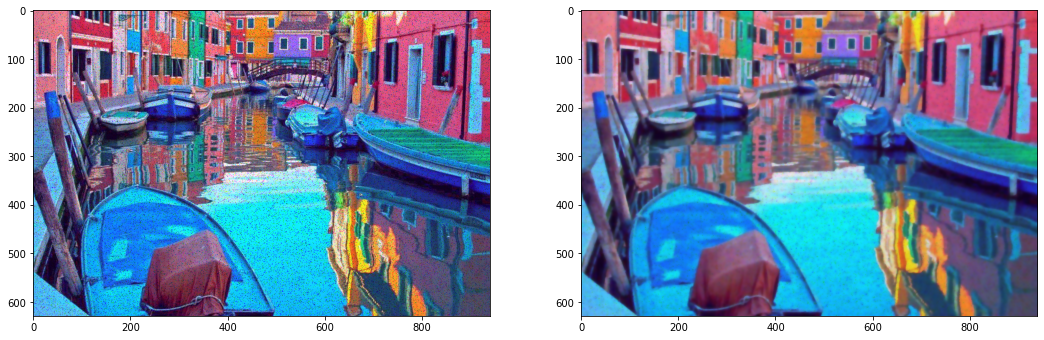

In [53]:
########### DENOSING ################


from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
img_path="photo.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
# Add noise to the image
gimg = skimage.util.random_noise(img, mode="pepper")
plt.subplot(1, 2, 1),plt.imshow(gimg)
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(gimg ,weight=0.3,multichannel=True)
plt.subplot(1, 2, 2),plt.imshow(denoised_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe6fbb65748>,
 <matplotlib.image.AxesImage at 0x7fe6fbb19978>)

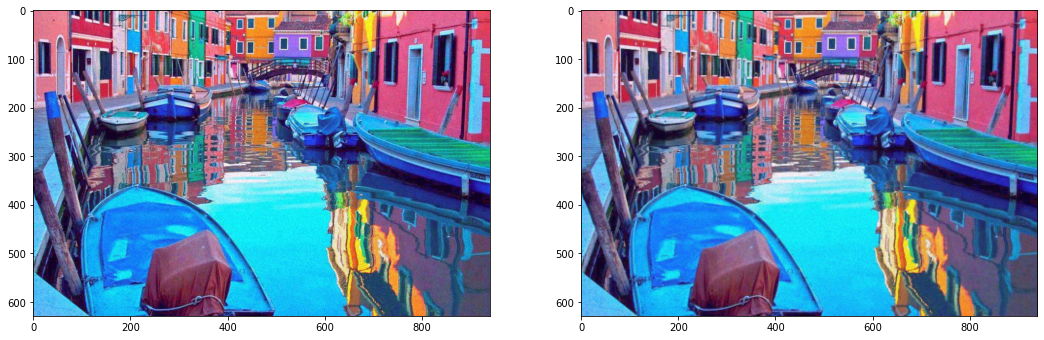

In [52]:

##### Wavelet denoising#####


from skimage.restoration import denoise_wavelet
import skimage.io
import matplotlib.pyplot as plt
plt.figure(figsize=(18,24))
img_path="photo.jpg"
img = skimage.io.imread(img_path)/255.0
# Add noise to the image
gimg = skimage.util.random_noise(img, mode="poisson")
plt.subplot(1, 2, 1),plt.imshow(gimg)
# Apply denoise_wavelet filter denoising
denoised_image = denoise_wavelet(gimg, sigma=0.1)
plt.subplot(1, 2, 2), plt.imshow(denoised_image)